# Objective: Implement the K-means clustering algorithm without the use of machine learning packages

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import scipy
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')
import math as m
import csv
import time
import matplotlib.pyplot as plt
import sklearn

In [2]:
segment, meta = arff.loadarff("segment.arff")


segment = pd.DataFrame(segment)
segment.to_csv('segment.csv')

## ---------------------- Normalize ----------------------

In [3]:
segment_z = np.empty((segment.shape[0],segment.shape[1]))
features = segment.shape[1]-1
instances = segment.shape[0]

for j in range(0, features):  # this is columns (variables)
    for i in range(0, instances):  # this is rows (observations)
        mu = segment.iloc[:,j].mean()
        std = segment.iloc[:,j].std()
        zscore = (segment.iloc[i, j]-mu)/std 
        segment_z[i, j] = zscore

segment_z = pd.DataFrame(segment_z)
segment_z.columns = list(segment)

In [4]:
segment_z['class'] = segment['class']
segment_z

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,1.275912,0.949531,NaN,2.410147,-0.194510,-0.392976,-0.115095,-0.363873,-0.130916,0.591412,0.560071,0.712983,0.469592,-0.765286,1.296198,-1.428735,0.700920,-0.472591,-0.438515,b'path'
1,-0.163301,0.114514,NaN,-0.356970,-0.194510,-0.598820,-0.121713,-0.579319,-0.133963,-0.947253,-0.936767,-0.956461,-0.935919,0.865381,-0.838392,0.552706,-0.992082,2.510221,-0.492031,b'foliage'
2,1.056604,-1.433747,NaN,-0.356970,-0.194510,-0.351806,-0.110089,-0.363873,-0.122733,2.252318,2.256706,2.196088,2.290634,-1.791637,1.472186,-0.697721,2.204955,-0.996656,-0.606356,b'sky'
3,-1.273551,0.862550,NaN,-0.356970,-0.194510,-0.063626,-0.087582,1.821364,-0.025407,0.171336,0.192206,0.199897,0.115158,0.050050,0.331091,-0.611153,0.180594,-0.700711,-0.411537,b'path'
4,-0.876054,1.280058,NaN,-0.356970,-0.194510,-0.166549,-0.093518,0.051629,-0.107432,0.328501,0.325398,0.399006,0.243488,-0.295267,0.739842,-0.957424,0.382513,-0.542982,-0.426686,b'path'
5,0.330144,1.071304,NaN,-0.356970,-0.194510,-0.125376,-0.103492,0.174743,-0.107432,0.321709,0.357110,0.353058,0.246544,0.059641,0.473019,-0.861239,0.335917,-0.661401,-0.381712,b'path'
6,0.988070,1.836736,NaN,-0.356970,-0.194510,-0.187131,-0.092209,-0.348483,-0.130536,-0.505833,-0.534016,-0.604193,-0.355382,0.155562,-1.071153,1.658847,-0.557183,-0.399353,2.597816,b'grass'
7,-1.314671,-0.216014,NaN,-0.356970,-0.194510,-0.557652,-0.121940,-0.502374,-0.137589,-0.828894,-0.740149,-0.869671,-0.856477,1.479277,-0.951934,0.129486,-0.891123,0.601202,0.300930,b'brickface'
8,-1.698461,-0.737900,NaN,-0.356970,-0.194510,3.806265,5.836508,1.882920,3.351712,-0.411728,-0.537187,-0.313188,-0.404270,-0.803651,0.319738,0.264146,-0.339731,0.737547,-0.695974,b'foliage'
9,-0.766400,-0.668315,NaN,2.410147,-0.194510,0.450986,0.055703,0.420964,0.020354,-0.408818,-0.353255,-0.369348,-0.505099,0.836605,-0.071984,-0.716956,-0.396684,0.046038,-0.192180,b'brickface'


In [5]:
segment_z = segment_z.drop(columns='region-pixel-count')   #dropping because it provides no information as the value is constant for all instance

In [6]:
centroid_list = [775, 1020, 200, 127, 329, 1626, 1515, 651, 658, 328, 1160, 108, 422, 88, 105, 261, 212,
1941, 1724, 704, 1469, 635, 867, 1187, 445, 222, 1283, 1288, 1766, 1168, 566, 1812, 214,
53, 423, 50, 705, 1284, 1356, 996, 1084, 1956, 254, 711, 1997, 1378, 827, 1875, 424,
1790, 633, 208, 1670, 1517, 1902, 1476, 1716, 1709, 264, 1, 371, 758, 332, 542, 672, 483,
65, 92, 400, 1079, 1281, 145, 1410, 664, 155, 166, 1900, 1134, 1462, 954, 1818, 1679,
832, 1627, 1760, 1330, 913, 234, 1635, 1078, 640, 833, 392, 1425, 610, 1353, 1772, 908,
1964, 1260, 784, 520, 1363, 544, 426, 1146, 987, 612, 1685, 1121, 1740, 287, 1383, 1923,
1665, 19, 1239, 251, 309, 245, 384, 1306, 786, 1814, 7, 1203, 1068, 1493, 859, 233, 1846,
1119, 469, 1869, 609, 385, 1182, 1949, 1622, 719, 643, 1692, 1389, 120, 1034, 805, 266,
339, 826, 530, 1173, 802, 1495, 504, 1241, 427, 1555, 1597, 692, 178, 774, 1623, 1641,
661, 1242, 1757, 553, 1377, 1419, 306, 1838, 211, 356, 541, 1455, 741, 583, 1464, 209,
1615, 475, 1903, 555, 1046, 379, 1938, 417, 1747, 342, 1148, 1697, 1785, 298, 1485,
945, 1097, 207, 857, 1758, 1390, 172, 587, 455, 1690, 1277, 345, 1166, 1367, 1858, 1427,
1434, 953, 1992, 1140, 137, 64, 1448, 991, 1312, 1628, 167, 1042, 1887, 1825, 249, 240,
524, 1098, 311, 337, 220, 1913, 727, 1659, 1321, 130, 1904, 561, 1270, 1250, 613, 152,
1440, 473, 1834, 1387, 1656, 1028, 1106, 829, 1591, 1699, 1674, 947, 77, 468, 997, 611,
1776, 123, 979, 1471, 1300, 1007, 1443, 164, 1881, 1935, 280, 442, 1588, 1033, 79, 1686,
854, 257, 1460, 1380, 495, 1701, 1611, 804, 1609, 975, 1181, 582, 816, 1770, 663, 737,
1810, 523, 1243, 944, 1959, 78, 675, 135, 1381, 1472]

In [7]:
start_time = time.time()
k_sse = []
k_std = []
for k in range(1,12+1):
    #print("k = ",k)
    subset = [] #for df later
    num_of_its = [] #for df later
    sse_list = []
    for i in range(0,25*k,k):    #range(0,len(centroid_list),k) choosing the subset of centroid instances from list
        #MAKE CENTROIDS FROM GIVEN LIST --> CALL THEM OLD_CENTROIDS
        current_centroids = []
        #print("i = ",i)
        current_centroids.append(centroid_list[i:i+k])
        centroid_data = segment_z.iloc[current_centroids[0]]
        centroid_data = pd.DataFrame(centroid_data)
        data_remaining = segment_z.drop(segment_z.index[current_centroids[0]])
        classes_remaining = data_remaining['class']
        data_remaining['index_new'] = range(0,len(data_remaining))
        centroid_data['index_new'] = current_centroids[0]
        data_indexes_new = data_remaining    #use for later when identifying the indexes in argsort
        data_remaining = data_remaining.drop(columns=['class','index_new'])    #data remaining without the class 
        centroid_data = centroid_data.drop(columns=['class','index_new'])
        old_centroids = centroid_data
        #print("old centroids = ",old_centroids)

        #CREATE CLUSTERS USING THOSE CENTROIDS --> CALL THOSE OLD_CLUSTERS
        euc_distance = scipy.spatial.distance.cdist(old_centroids,data_remaining,'euclidean') #distance between the 5 random centroids and the rest of the instances in the dataset
        argmin = np.argmin(euc_distance,axis=0)
        data_remaining['new labels'] = argmin
        old_clusters = []
        for c in range(0,k):  #k
            old_clusters.append(data_remaining.loc[data_remaining['new labels'] == c])  #k
        #print("old_clusters[0] = ",old_clusters[0])

        #FIND NEW CENTROIDS BY TAKING THE MEAN OF THE COLUMNS FROM THE OLD CLUSTERS
        new_centroids = []
        for n in range(0,len(old_clusters)):
            new_centroids.append(np.mean(old_clusters[n]))
        new_centroids = pd.DataFrame(new_centroids)
        new_centroids = new_centroids.drop(columns='new labels')
        #print("new centroids = ",new_centroids)

        #CREATE NEW CLUSTERS USING THE NEW CENTROIDS --> CALL THOSE NEW CLUSTERS
        data_remaining = data_remaining.drop(columns=['new labels'])   #get rid of the old labels
        euc_distance_new = scipy.spatial.distance.cdist(new_centroids,data_remaining,'euclidean')
        argmin_new = np.argmin(euc_distance_new,axis=0)
        data_remaining['new labels'] = argmin_new
        new_clusters = []
        for l in range(0,k):  #k
            new_clusters.append(data_remaining.loc[data_remaining['new labels'] == l])  #k
        #print("new_clusters[0] = ",new_clusters[0])

        def dist(a, b, ax=1):
            return np.linalg.norm(a - b, axis=ax)

        error = dist(new_centroids.values,old_centroids.values,None)
        #print("error = ",error)

        #print("diff = ",old_centroids.values - new_centroids.values)

        iterations = 0
        while error != 0 and iterations < 50:    
            iterations = iterations + 1
            #print("iteration = ",iterations)

            old_centroids = new_centroids
            #print("old_centroids = ",old_centroids)
            old_clusters = new_clusters
            #print("old_clusters = ",old_clusters)

            #FIND NEW CENTROIDS BY TAKING THE MEAN OF THE COLUMNS FROM THE OLD CENTROIDS
            new_centroids = []
            for n in range(0,len(old_clusters)):
                new_centroids.append(np.mean(old_clusters[n]))
            new_centroids = pd.DataFrame(new_centroids)
            new_centroids = new_centroids.drop(columns='new labels')
            #print("new centroids[0] = ",new_centroids.iloc[0])


            #CREATE NEW CLUSTERS USING THE NEW CENTROIDS --> CALL THOSE NEW CLUSTERS
            data_remaining = data_remaining.drop(columns=['new labels'])   #get rid of the old labels
            euc_distance_new = scipy.spatial.distance.cdist(new_centroids,data_remaining,'euclidean')
            argmin_new = np.argmin(euc_distance_new,axis=0)
            data_remaining['new labels'] = argmin_new
            new_clusters = []
            for l in range(0,k):  #k
                new_clusters.append(data_remaining.loc[data_remaining['new labels'] == l])  #k
            #print("new_clusters[0] = ",new_clusters[0])

            error = dist(new_centroids.values,old_centroids.values,None)
            #print("error = ",error)
        

        #FIND SSE OF FINAL CLUSTER
        cluster_sse = []
        for j in range(0,k):   #range of clusters
            sqerror = np.linalg.norm(new_clusters[j].drop(columns=['new labels']).values - new_centroids.iloc[j].values)**2
            cluster_sse.append(sqerror)
        #print("cluster_sse =",cluster_sse)
        sse_list.append(sum(cluster_sse))
        
        #record results
        subset.append(current_centroids)
        num_of_its.append(iterations)
            
    #DATAFRAME WITH RESULTS        
    df = pd.DataFrame({'subset': subset,
                       'Number of iterations':num_of_its,
                       'SSE':sse_list})
    #print("df = ",df)
    
    #FIND FINAL MEAN SSE
    k_sse.append(np.mean(df['SSE']))
    #print("average SSE = ",np.mean(df['SSE']))
    
    #FINAL FINAL STD
    k_std.append(np.std(df['SSE']))
    #print("standard deviation = ",np.std(df['SSE']))
    
    

print("K_SSE =",k_sse)
print("k_std = ",k_std)
print("--- %s seconds ---" % (time.time() - start_time))

K_SSE = [41551.497855591675, 29188.007510096784, 24531.83757718587, 21131.01674439931, 18125.26756563526, 16015.936561915269, 14490.492815699314, 13122.730637836195, 12355.482462171143, 11486.46532326634, 10974.945346430868, 10447.314777803367]
k_std =  [8.086884628754213, 2072.46566742833, 888.436779215638, 1570.941207486701, 1868.1327151084256, 1667.6756267231385, 1537.9038856334246, 1164.6653668197134, 729.794997281812, 653.1821815809521, 765.8501569604756, 640.7716161134607]
--- 51.90720582008362 seconds ---


In [8]:
2*k_std[0]

16.173769257508425

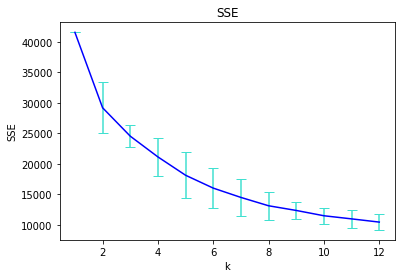

In [10]:
#Plot SSE

#plt.plot(k_sse)
plt.title('SSE')
plt.xlabel('k')
plt.ylabel('SSE')
yerr = k_std
plt.errorbar([i for i in range(1,13)],k_sse,yerr=np.dot(2,k_std),color='blue',ecolor='turquoise',capsize=5)
plt.show()
